In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [6]:
dt=pd.read_csv("/content/delivery_time.csv")

In [7]:
dt

Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5

In [8]:
dt.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [9]:
#EDA
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
dt.shape

(21, 2)

In [12]:
dt.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [16]:
#Correction of coefficient
corr1=dt.corr()
corr1

Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000

<Axes: >

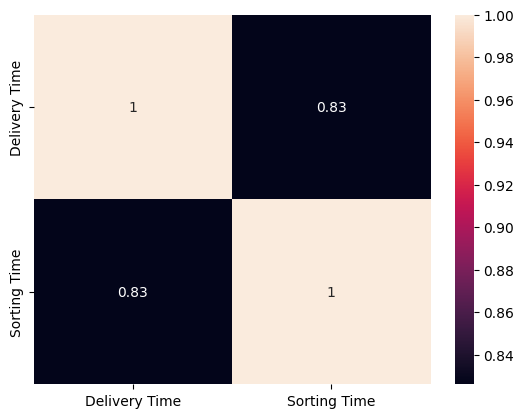

In [17]:
sns.heatmap(corr1,annot=True)

# There is a positive correlation between delivery time and sorting time

In [18]:
dt.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

In [20]:
#The average Delivery Time and Sorting Time is 16.79 and 6.19 respectively

#The minimum delivery time is 8.00 and maximum delivery time is 29.00

#The minimum sorting time is 2.00 and maximum sorting time is 10.00

In [22]:
dt.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [23]:
dt.kurtosis()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [24]:
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### There are no null values

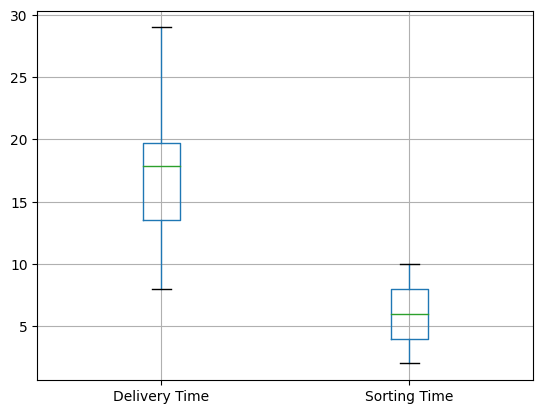

In [25]:
#Box plot
dt.boxplot()
plt.show()

### From above graph we can say that there are no uutlier in our data

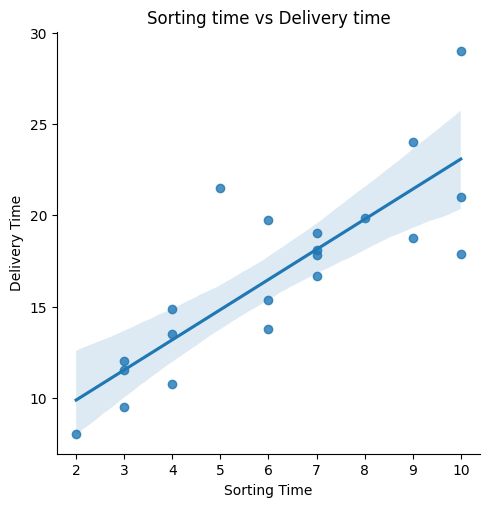

In [28]:
# To Check linearity
sns.lmplot(x='Sorting Time', y='Delivery Time', data=dt)
plt.title('Sorting time vs Delivery time')
plt.show()

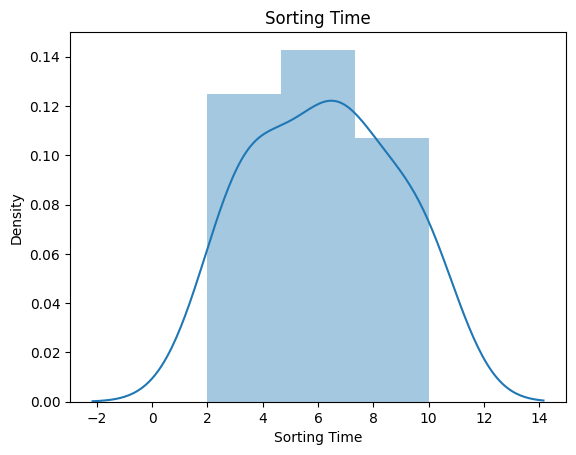

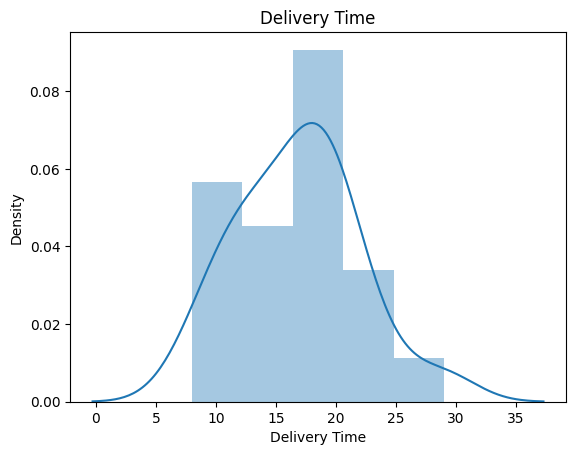

In [30]:
#Checking Normality
sns.distplot(a=dt['Sorting Time'])
plt.title('Sorting Time')
plt.show()
sns.distplot(a=dt['Delivery Time'])
plt.title("Delivery Time")
plt.show()

###for Sorting Time most of the data lie within the group 2 - 10 for Delivery Time most of the data lie within the group 10 - 20

In [32]:
#Model building and model training
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [33]:
dt.columns=['Delivery','Sorting']
dt.head()

Delivery  Sorting
0     21.00       10
1     13.50        4
2     19.75        6
3     24.00        9
4     29.00       10

In [34]:
#fitting model
import statsmodels.formula.api as smf
linear_model=smf.ols('Delivery~Sorting',data=dt).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        10:15:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

In [35]:
#parameters
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [36]:
# T - Values and P - Values
print(linear_model.tvalues,'\n',linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [37]:
# R square values
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [38]:
#by using Log Transformtion
dt['log_sorting']=np.log(dt['Sorting'])
dt.head()

Delivery  Sorting  log_sorting
0     21.00       10     2.302585
1     13.50        4     1.386294
2     19.75        6     1.791759
3     24.00        9     2.197225
4     29.00       10     2.302585

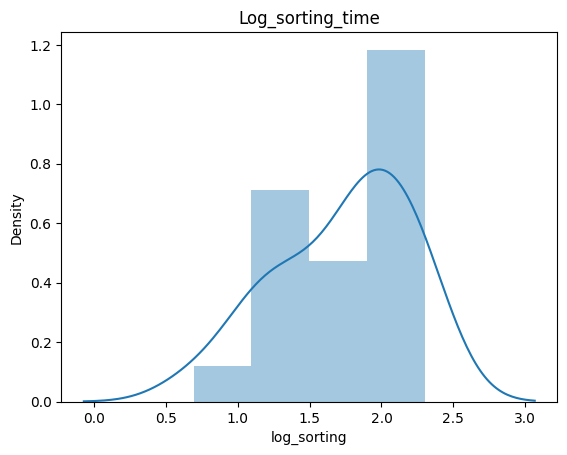

In [39]:
sns.distplot(dt['log_sorting'])
plt.title('Log_sorting_time')
plt.show()

In [42]:
#model Building using log transformation
# fitting model after transformating input variable
linear_model_1=smf.ols("Delivery~log_sorting",data=dt).fit()
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        10:27:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#parameters
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [44]:
# T - Values and P - Values
print(linear_model_1.tvalues,'\n',linear_model_1.pvalues)

Intercept      0.472460
log_sorting    6.586789
dtype: float64 
 Intercept      0.641980
log_sorting    0.000003
dtype: float64


In [45]:
# R square values
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

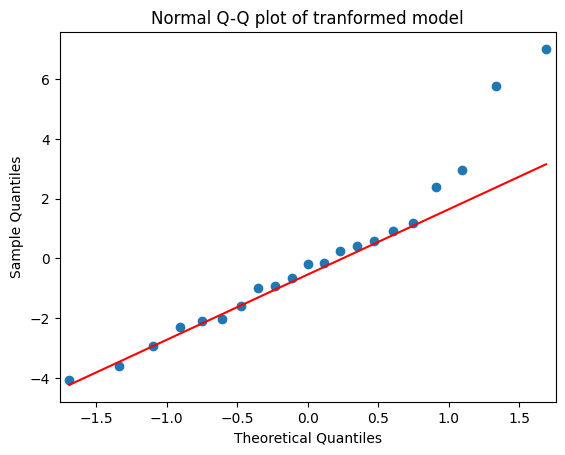

In [46]:
#Normal Q-Q plot of residuals for Norminality for Transformed model
sm.qqplot(linear_model_1.resid,line='q')
plt.title("Normal Q-Q plot of tranformed model")
plt.show()

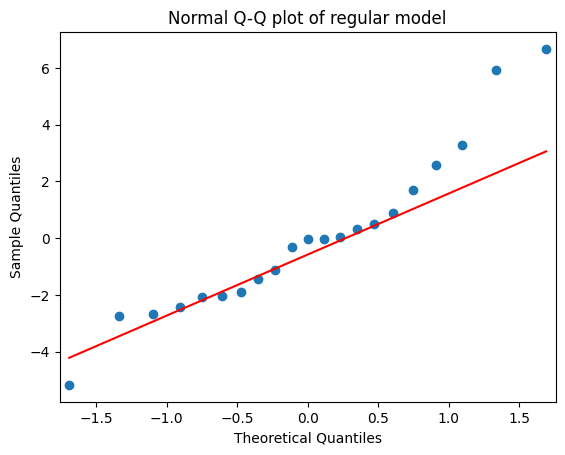

In [47]:
#Normal Q-Q Plot of Residuals for Normality
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

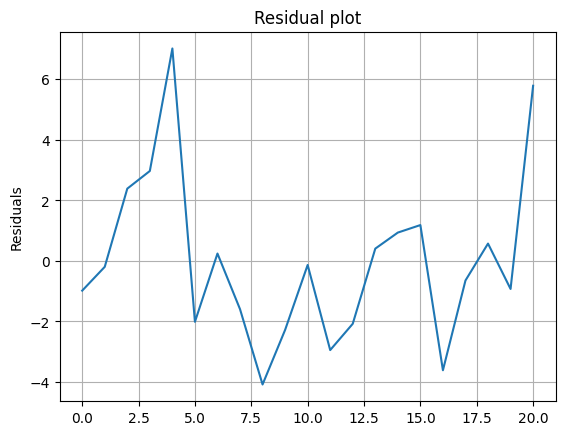

In [49]:
#Residual plot for tranformed model
plt.plot(linear_model_1.resid)
plt.title("Residual plot")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [50]:
pred_y = linear_model_1.fittedvalues
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

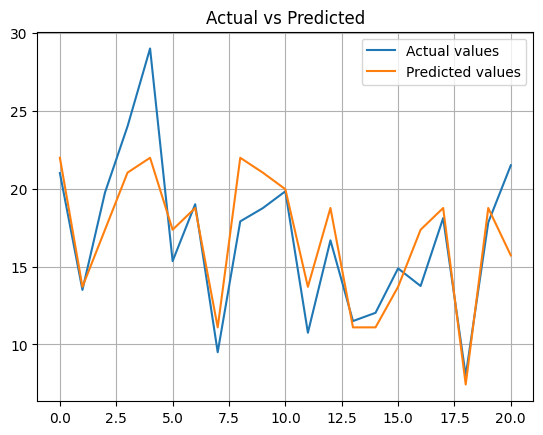

In [51]:
from sqlalchemy import label
#plot for actual and fitted values
plt.plot(dt['Delivery'],label='Actual values')
plt.plot(pred_y,label="Predicted values")
plt.title("Actual vs Predicted")
legend=plt.legend()
plt.grid(True)
plt.show()

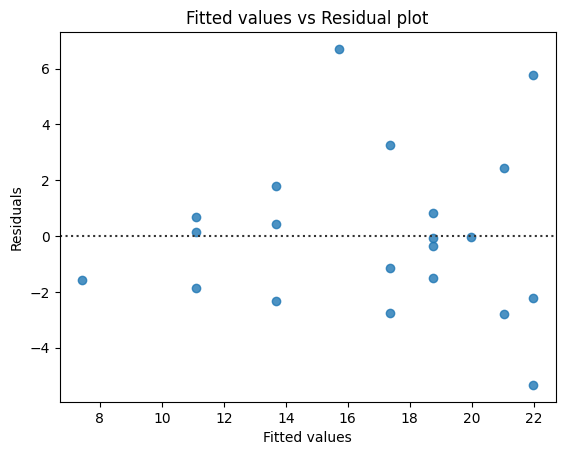

In [52]:
#Residual Vs Fitted Values plot
sns.residplot(x=pred_y,y=linear_model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()